# Detecção de objetos complexos com redes neurais.

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento de objetos em vídeos. 

Para isso, vamos utilizar uma arquitetura de rede neural chamada **MobileNet**, que é uma rede neural convolucional (CNN) desenvolvida para dispositivos móveis e outra chamada **YOLO** (You Only Look Once), que é uma rede neural para detecção de objetos em tempo real.

A arquitetura da **MobileNet** é otimizada para consumir pouca memória e processamento, sendo ideal para dispositivos com poucos recursos computacionais, como smartphones, tablets, Raspberry Pi, etc.

A arquitetura da **YOLO** é otimizada para ser rápida, sendo capaz de processar vídeos em tempo real com uma boa acurácia.

Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Nesta atividade você aprenderá a:

1. Carregar uma rede neural pré-treinada;
2. Detectar objetos em imagens e vídeos;
3. Processar a saída da rede neural.

O objetivo desta atividade é detectar vacas e lobos e avaliar se há uma situação de perigo ou não perigo para as vacas. A figura abaixo mostra um exemplo de situação de perigo e não perigo. É considerado perigo quando os lobos estão flanqueando as vacas, ou seja, quando os lobos estão cercando as vacas.

Devido a limitações no treinaento da rede neural, considere que toda detecção de `dog`, `horse`  e `sheep` também será de lobos.

**Perigo**

<img src="img/perigo.jpg" width=50%></img>

**Não perigo**

<img src="img/nao_perigo.jpg" width=50%></img>

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

from atividade3 import DangerDetector

## Herdar a Classe do MobileNet

No arquivo `atividade3.py` modifique a classe `DangerDetector` para herdar da classe `MobileNetDetector`, que está no arquivo [module_net.py](module_net.py). Dessa forma, você poderá utilizar os métodos da classe `MobileNetDetector` na classe `DangerDetector`. Certifique-se que a classe `DangerDetector` está no mesmo diretório que a classe `MobileNetDetector`.

Certifique-se que os arquivos de pesos da MobileNet estão no diretório indicado na chamada do construtor da classe `MobileNetDetector`.

In [2]:
# Deve funcionar para todas as imagens em cow_wolf
img = cv2.imread("img/cow_wolf01.png")

# Carregar classe
Detector = DangerDetector(CONFIDENCE = 0.7)

image, resultados = Detector.detect(img)

print(resultados)

# Saida Esperada:
# [('cow', 99.0637481212616, (379, 131), (560, 251)), ('horse', 94.41149830818176, (53, 103), (297, 286)), ('horse', 93.70213747024536, (626, 103), (860, 285))]

[('cow', 99.0637481212616, (379, 131), (560, 251)), ('horse', 94.41148042678833, (53, 103), (297, 286)), ('horse', 93.70208382606506, (626, 103), (860, 285))]


## Região de Perigo

Modifique a função `separar_caixa_entre_animais` do arquivo [atividade3.py](atividade3.py) utilizando a saida da MobileNet para definir um caixa azul sobre cada vaca e uma caixa vermelha unindo ambos os lobos.

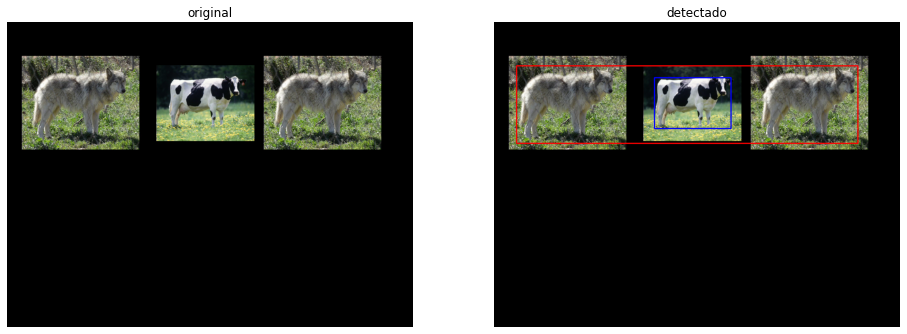

In [3]:
saida, animais = Detector.separar_caixa_entre_animais(img, resultados)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Caixa vermelha sobre todos os lobos e uma caixa azul em cada vaca

## Descubra se a vaca esta em perigo
Modifique a função `checar_perigo` do arquivo [atividade3.py](atividade3.py) para passar por cada vaca e modifique a função `calcula_iou` do arquivo [atividade3.py](atividade3.py) para calcular se existe intersecção entre as caixas.

Escreva sobre cada vaca se ela esta ou não em perigo.
Vermelho para perigo, se não, azul.

Dica: IoU (Intersection over Union): https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

Neste caso, calcular a intersecção já bastaria.

In [4]:
Detector.checar_perigo(saida, animais)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Vaca esta em perigo (em vermelho) para a imagem cow_wolf01.png

53 [379, 131, 560, 251]


IndexError: invalid index to scalar variable.

## Final: Adicionar no video

Modifique o arquivo [cow_wolf.py](cow_wolf.py) para identificar se as vacas estao em perigo no video [cow_wolf.mp4](cow_wolf/cow_wolf.mp4)
Publique o video no Youtube e informe o link do vídeo publicado no início deste notebook.